In [1]:
import numpy as np
import os
import glob
import pandas as pd
parent_dir_path=os.path.abspath( os.path.join(os.getcwd(),'..')) 

In [2]:
main_direct=parent_dir_path+'/demos/'
ana_mr_39=np.loadtxt(main_direct+'ana_mr_39.txt')
ana_pran_39=np.loadtxt(main_direct+'ana_pran_39.txt')
phe_mr_39=np.loadtxt(main_direct+'phenom_mr_modify_n39.txt')
phe_pran_39=np.loadtxt(main_direct+'phe_pran.txt')
obs_mr_53=np.loadtxt(main_direct+'mr_obs_53.txt')
mr_all_info=pd.read_csv(main_direct+'39_mr_all_info.csv')
obs_mr_39=obs_mr_53[0:39*10000]

In [3]:
ana_pran=np.zeros(39)
for i in range(39):
    ana_pran[i]=np.mean( ana_pran_39[i*10000:(i+1)*10000] )

In [4]:
mr_39_part1=np.zeros((39,2))
mr_39_part1[:,0]=ana_pran
mr_39_part1[:,1]=phe_pran_39
df_mr_39_part1=pd.DataFrame(mr_39_part1,columns=['p0ana','p0phe'])
df_mr_39_all=pd.concat((mr_all_info,df_mr_39_part1),axis=1)
df_mr_39_partinfo=df_mr_39_all[['Pname','P0','p0ana','p0phe']]

In [5]:
pnames=['J0514$-$4002A', 'J1829+2456' ,'B1534+12' ,'J0737$-$3039A' ,'J0509+3801',
 'J1757$-$1854', 'J1756$-$2251' ,'B2127+11C', 'J1807$-$2500B','B1913+16',
 'J0453+1559' ,'J1913+1102' ,'J1802$-$2124', 'J2045+3633' ,'J1918$-$0642',
 'J1910$-$5959A' ,'J1949+3106' ,'J1713+0747' ,'J2234+0611' ,'J2043+1711',
 'J2053+4650' ,'J0337+1715' ,'J0437$-$4715', 'J1738+0333' ,'J1909$-$3744',
 'J1950+2414' ,'J1125$-$6014' ,' J1857+0943' ,'J0751+1807' ,'J0955$-$6150',
 'J1012+5307' ,'J1600$-$3053' ,'J1946+3417' ,'J2222$-$0137' ,'J1614$-$2230',
 'J0348+0432' ,'J0740+6620' ,'J1903+0327' ,'J0030+0451']
sort_mr_indexs=[12,  0, 13, 14,  1, 15,  2,  3,  4, 16,  5,  6, 17, 18,  7,  8, 19,
       20, 21,  9, 38, 22, 23, 24, 25, 26, 27, 10, 11, 28, 37, 29, 30, 31,
       32, 33, 34, 35, 36] 

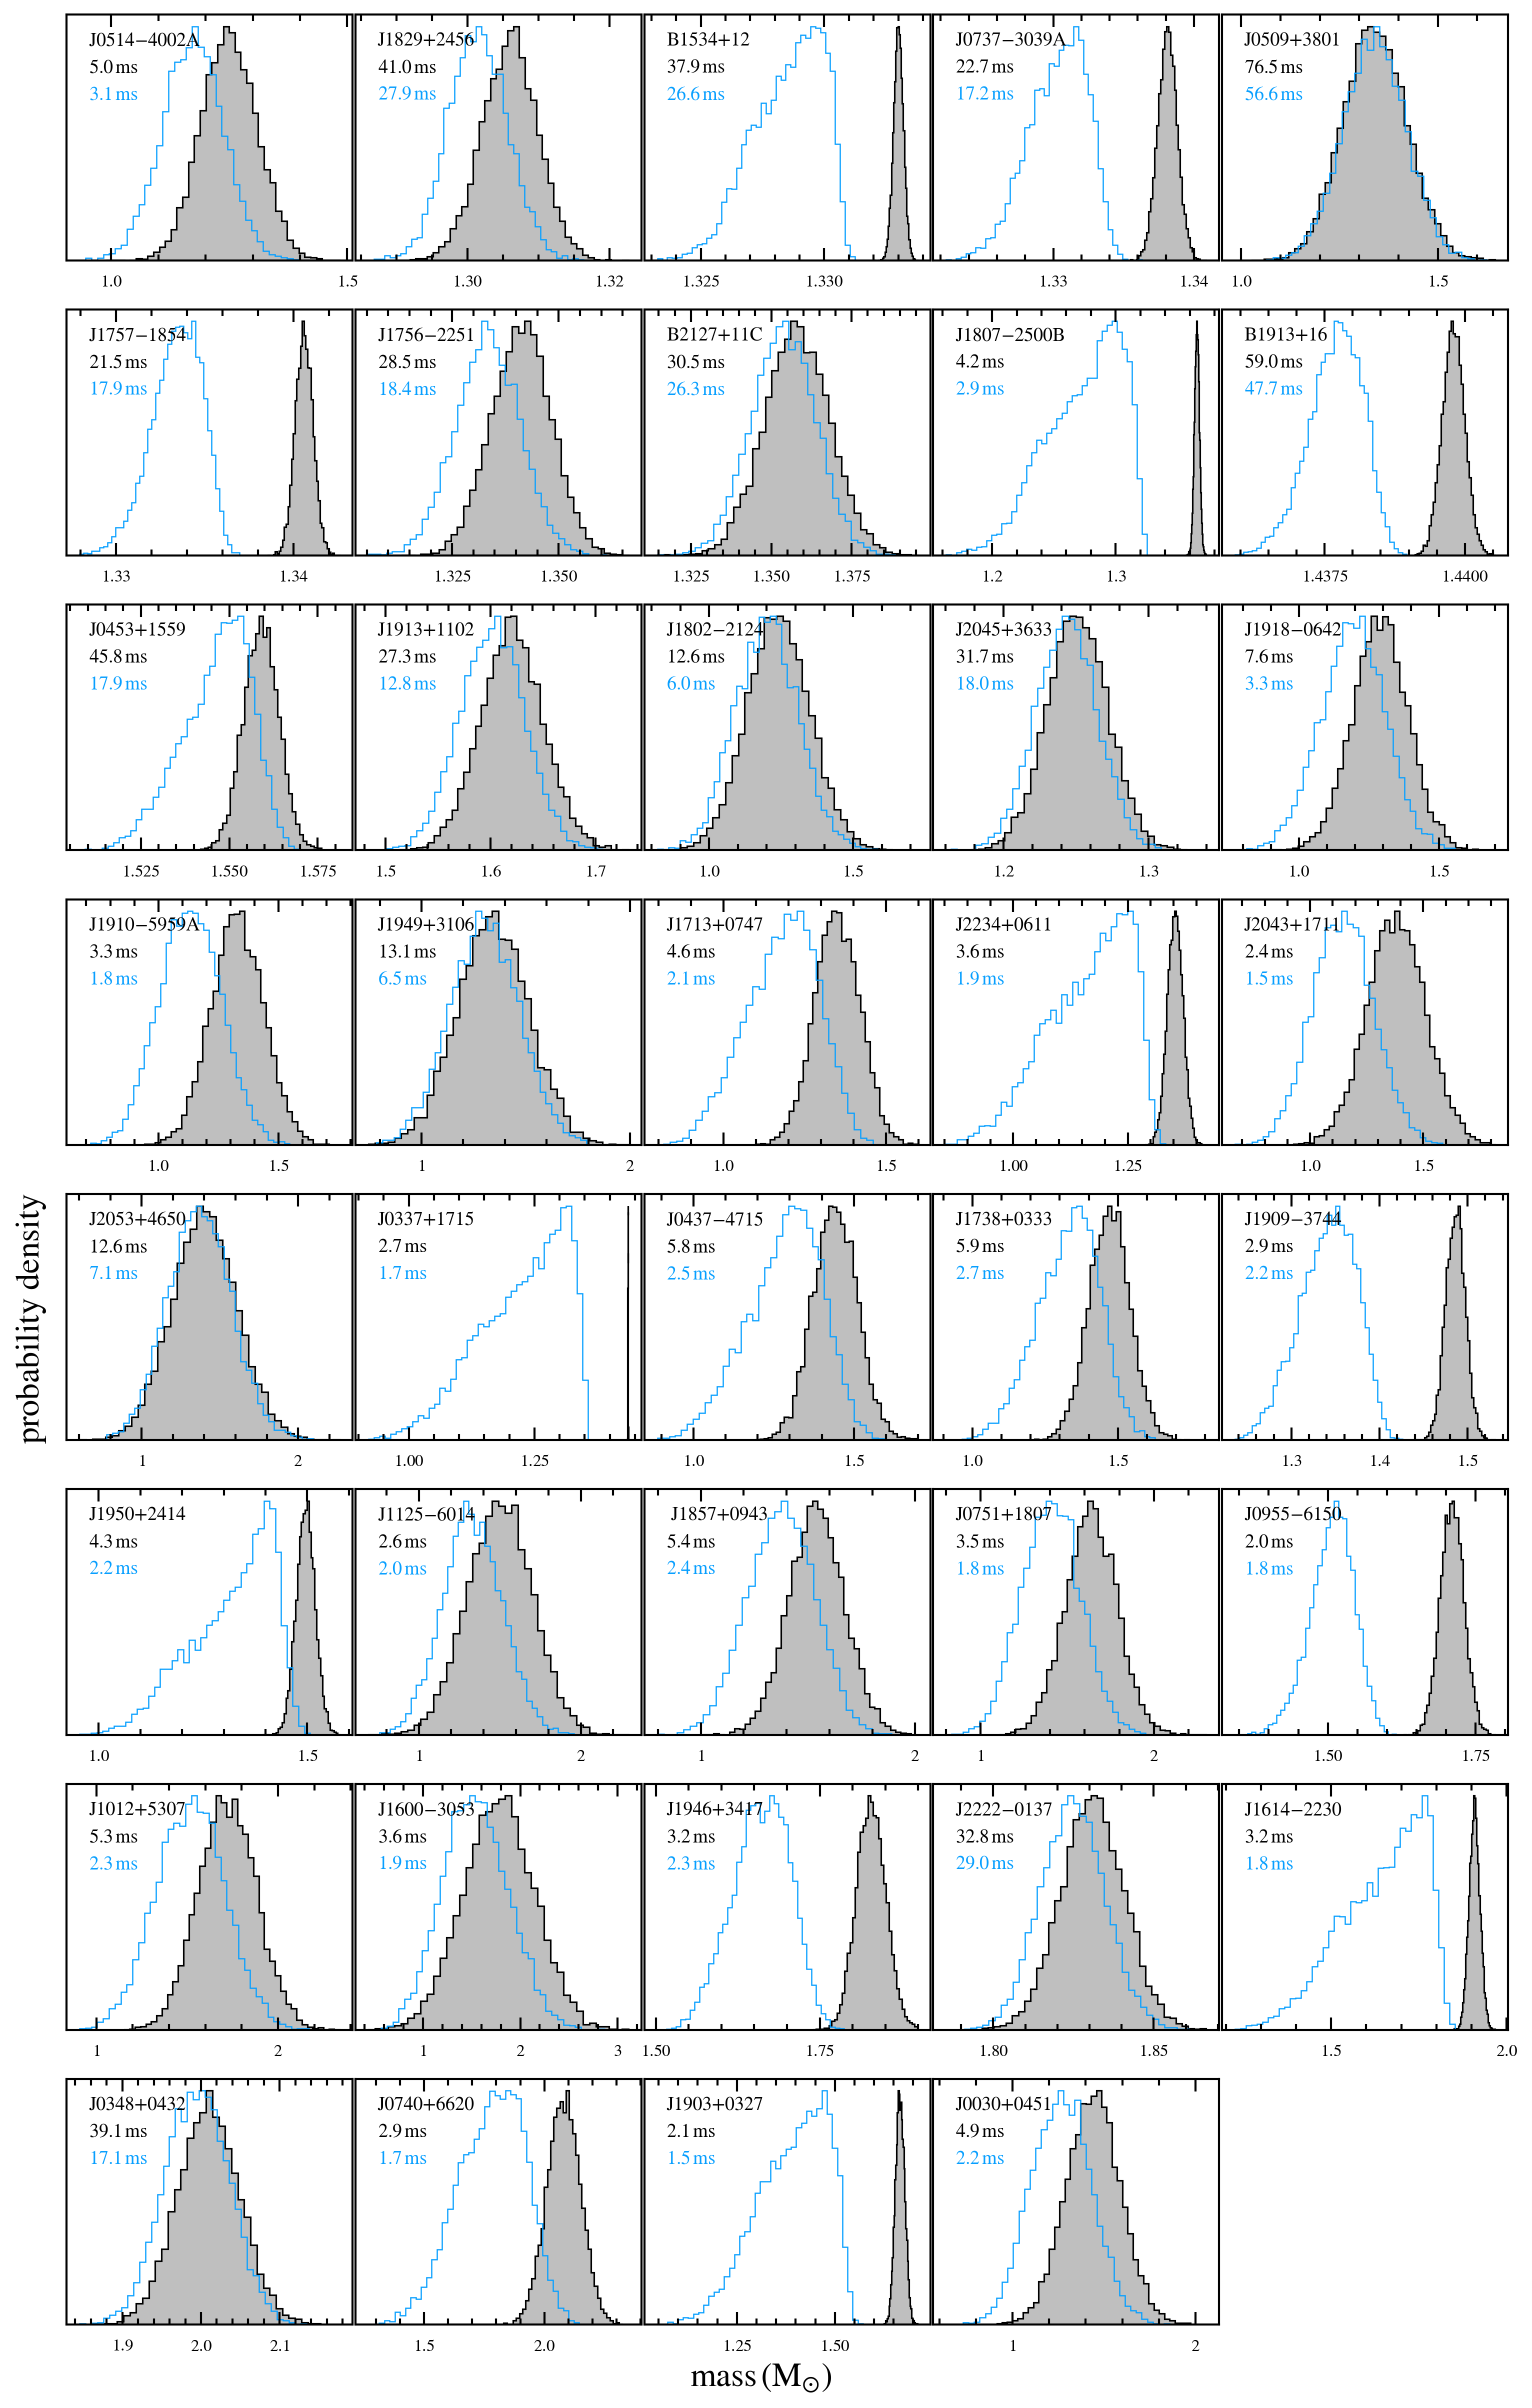

In [6]:
import corner.corner
import scienceplots
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])

#tau=np.loadtxt('cal_li_percent.txt')
li=abs(phe_mr_39)
obs=abs(obs_mr_39)
spin_up=abs(ana_mr_39)

from decimal import Decimal 

data_id = sort_mr_indexs

for i in sort_mr_indexs:
    label_names=pnames[i]
    plt.rcParams["figure.figsize"] = (6.2,10)
    plt.subplot(8,5,i+1)
    
    p0_lab=format(df_mr_39_partinfo['P0'][i]*1000 , '.1f')
    p0_li_percent=format(df_mr_39_partinfo['p0phe'][i]*1000, '.1f')
    p0_m_ana=format(df_mr_39_partinfo['p0ana'][i]*1000 , '.1f')
    
    plt.grid(False)
    
    fre_num_oran, x_edge_oran = np.histogram(obs[i*10000 : (i+1)*10000 ],bins=40)
        
    plt.stairs(fre_num_oran/np.max(fre_num_oran),x_edge_oran,color='grey',fill=True,alpha=0.5,ls='-') 
    plt.stairs(fre_num_oran/np.max(fre_num_oran),x_edge_oran,color='k',fill=0,alpha=1,ls='-',lw=0.38) 
    plt.stairs(fre_num_oran/np.max(fre_num_oran),x_edge_oran,color='k',lw=0.001,alpha=0.001,ls='-',label=r'{}'.format(pnames[i])) 
    plt.stairs(fre_num_oran/np.max(fre_num_oran),x_edge_oran,color='k',lw=0.001,alpha=0.00,ls='-',label=r'${}\,\rm ms$'.format( p0_lab)) 
    
    #fre_num_li, x_edge_li = np.histogram(li[i*10000 : (i+1)*10000 ],bins=40)
    #plt.stairs(fre_num_li/np.max(fre_num_li),x_edge_li,color='#ff7f0e',lw=0.3,ls='-') 
    #plt.stairs(fre_num_li/np.max(fre_num_li),x_edge_li,color='#ff7f0e',lw=0.001,alpha=0.00,ls='-',label=r'${}\,\rm ms$'.format( p0_li_percent))
    
    fre_num_spin_up, x_edge_spin_up = np.histogram(spin_up[i*10000 : (i+1)*10000 ],bins=40)
    plt.stairs(fre_num_spin_up/np.max(fre_num_spin_up),x_edge_spin_up,color='#089FFF',lw=0.3,ls='-')
    plt.stairs(fre_num_spin_up/np.max(fre_num_spin_up),x_edge_spin_up,color='#089FFF',lw=0.001,alpha=0.00,ls='-',label=r'${}\,\rm ms$'.format( p0_m_ana) )
    
    
    plt.xticks(fontsize=4)
    plt.yticks(fontsize=4)
    plt.yticks([])
    plt.subplots_adjust(wspace = 0.01)

            
    plt.legend(loc='upper left',labelcolor=['black','black','#089FFF'],frameon=0,bbox_to_anchor=(-0.17,1),fontsize=4.6)
    
plt.text(2.9, -0.26, r'$ \rm mass \,(M_{\odot})$', ha='center', fontsize=8)
plt.text(-0.2, 4.3, r'$\rm probability\,\,density$', va='center', rotation='vertical', fontsize=8)
plt.savefig(parent_dir_path+'/figures/fig1.pdf')
plt.show()